In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DecimalType, DateType
from pyspark.sql.functions import *
from pyspark.sql.window import Window
spark = SparkSession.builder.appName('IPL').getOrCreate()
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), nullable=False),
    StructField("over_id", IntegerType(), nullable=False),
    StructField("ball_id", IntegerType(), nullable=False),
    StructField("innings_no", IntegerType(), nullable=False),
    StructField("team_batting", StringType(), nullable=False),
    StructField("team_bowling", StringType(), nullable=False),
    StructField("striker_batting_position", IntegerType(), nullable=True),
    StructField("extra_type", StringType(), nullable=True),
    StructField("runs_scored", IntegerType(), nullable=True),
    StructField("extra_runs", IntegerType(), nullable=True),
    StructField("wides", IntegerType(), nullable=True),
    StructField("legbyes", IntegerType(), nullable=True),
    StructField("byes", IntegerType(), nullable=True),
    StructField("noballs", IntegerType(), nullable=True),
    StructField("penalty", IntegerType(), nullable=True),
    StructField("bowler_extras", IntegerType(), nullable=True),
    StructField("out_type", StringType(), nullable=True),
    StructField("caught", BooleanType(), nullable=False),
    StructField("bowled", BooleanType(), nullable=False),
    StructField("run_out", BooleanType(), nullable=False),
    StructField("lbw", BooleanType(), nullable=False),
    StructField("retired_hurt", BooleanType(), nullable=False),
    StructField("stumped", BooleanType(), nullable=False),
    StructField("caught_and_bowled", BooleanType(), nullable=False),
    StructField("hit_wicket", BooleanType(), nullable=False),
    StructField("obstructingfeild", BooleanType(), nullable=False),
    StructField("bowler_wicket", IntegerType(), nullable=False),
    StructField("match_date", DateType(), nullable=True),
    StructField("season", IntegerType(), nullable=True),
    StructField("striker", IntegerType(), nullable=True),
    StructField("non_striker", IntegerType(), nullable=True),
    StructField("bowler", IntegerType(), nullable=True),
    StructField("player_out", IntegerType(), nullable=True),
    StructField("fielders", IntegerType(), nullable=True),
    StructField("striker_match_sk", IntegerType(), nullable=True),
    StructField("strikersk", IntegerType(), nullable=True),
    StructField("nonstriker_match_sk", IntegerType(), nullable=True),
    StructField("nonstriker_sk", IntegerType(), nullable=True),
    StructField("fielder_match_sk", IntegerType(), nullable=True),
    StructField("fielder_sk", IntegerType(), nullable=True),
    StructField("bowler_match_sk", IntegerType(), nullable=True),
    StructField("bowler_sk", IntegerType(), nullable=True),
    StructField("playerout_match_sk", IntegerType(), nullable=True),
    StructField("battingteam_sk", IntegerType(), nullable=True),
    StructField("bowlingteam_sk", IntegerType(), nullable=True),
    StructField("keeper_catch", BooleanType(), nullable=False),
    StructField("player_out_sk", IntegerType(), nullable=True),
    StructField("matchdatesk", DateType(), nullable=True)
])
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).csv('s3://ipl-data-analysis-project/Ball_By_Ball.csv', header = True)


In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), nullable=False),
    StructField("match_id", IntegerType(), nullable=False),
    StructField("team1", StringType(), nullable=False),
    StructField("team2", StringType(), nullable=False),
    StructField("match_date", DateType(), nullable=True),
    StructField("season_year", IntegerType(), nullable=True),
    StructField("venue_name", StringType(), nullable=True),
    StructField("city_name", StringType(), nullable=True),
    StructField("country_name", StringType(), nullable=True),
    StructField("toss_winner", StringType(), nullable=True),
    StructField("match_winner", StringType(), nullable=True),
    StructField("toss_name", StringType(), nullable=True),
    StructField("win_type", StringType(), nullable=True),
    StructField("outcome_type", StringType(), nullable=True),
    StructField("manofmach", StringType(), nullable=True),
    StructField("win_margin", IntegerType(), nullable=True),
    StructField("country_id", IntegerType(), nullable=True)
])

match_df = spark.read.schema(match_schema).csv('s3://ipl-data-analysis-project/Match.csv', header = True)

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), nullable=False),
    StructField("player_id", IntegerType(), nullable=False),
    StructField("player_name", StringType(), nullable=False),
    StructField("dob", DateType(), nullable=True),
    StructField("batting_hand", StringType(), nullable=True),
    StructField("bowling_skill", StringType(), nullable=True),
    StructField("country_name", StringType(), nullable=True)
])

player_df = spark.read.schema(player_schema).csv('s3://ipl-data-analysis-project/Player.csv', header = True)

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), nullable=False),
    StructField("playermatch_key", DecimalType(), nullable=True),
    StructField("match_id", IntegerType(), nullable=False),
    StructField("player_id", IntegerType(), nullable=False),
    StructField("player_name", StringType(), nullable=False),
    StructField("dob", DateType(), nullable=True),
    StructField("batting_hand", StringType(), nullable=True),
    StructField("bowling_skill", StringType(), nullable=True),
    StructField("country_name", StringType(), nullable=True),
    StructField("role_desc", StringType(), nullable=True),
    StructField("player_team", StringType(), nullable=True),
    StructField("opposit_team", StringType(), nullable=True),
    StructField("season_year", IntegerType(), nullable=True),
    StructField("is_manofthematch", BooleanType(), nullable=True),
    StructField("age_as_on_match", IntegerType(), nullable=True),
    StructField("isplayers_team_won", BooleanType(), nullable=True),
    StructField("batting_status", StringType(), nullable=True),
    StructField("bowling_status", StringType(), nullable=True),
    StructField("player_captain", StringType(), nullable=True),
    StructField("opposit_captain", StringType(), nullable=True),
    StructField("player_keeper", StringType(), nullable=True),
    StructField("opposit_keeper", StringType(), nullable=True)
])

player_match_df = spark.read.schema(player_match_schema).csv('s3://ipl-data-analysis-project/Player_match.csv', header = True)

In [0]:
'''
team_schema = StructType([
    StructField("team_sk", IntegerType(), nullable=False),
    StructField("team_id", IntegerType(), nullable=False),
    StructField("team_name", StringType(), nullable=False)
])
team_schema_df = spark.read.schema(team_schema).csv('s3://ipl-data-analysis-project/Team.csv', header = True)
team_schema_df.printSchema()
'''
#inferSchema can handle this schema change, no need to create a seperate schema 

team_schema_df = spark.read.csv('s3://ipl-data-analysis-project/Team.csv', header = True, inferSchema = True)

In [0]:
ball_by_ball_df.show(5)
match_df.show(5)
player_df.show(5)
player_match_df.show(5)
team_schema_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:
ball_by_ball_df.columns

Out[7]: ['match_id',
 'over_id',
 'ball_id',
 'innings_no',
 'team_batting',
 'team_bowling',
 'striker_batting_position',
 'extra_type',
 'runs_scored',
 'extra_runs',
 'wides',
 'legbyes',
 'byes',
 'noballs',
 'penalty',
 'bowler_extras',
 'out_type',
 'caught',
 'bowled',
 'run_out',
 'lbw',
 'retired_hurt',
 'stumped',
 'caught_and_bowled',
 'hit_wicket',
 'obstructingfeild',
 'bowler_wicket',
 'match_date',
 'season',
 'striker',
 'non_striker',
 'bowler',
 'player_out',
 'fielders',
 'striker_match_sk',
 'strikersk',
 'nonstriker_match_sk',
 'nonstriker_sk',
 'fielder_match_sk',
 'fielder_sk',
 'bowler_match_sk',
 'bowler_sk',
 'playerout_match_sk',
 'battingteam_sk',
 'bowlingteam_sk',
 'keeper_catch',
 'player_out_sk',
 'matchdatesk']

In [0]:
#Creating a new dataframe : legal_balls_df
legal_balls_df = ball_by_ball_df.filter((col('wides') ==0) & (col('noballs') == 0))

In [0]:
total_and_avg_runs_scored = ball_by_ball_df.groupBy('match_id', 'innings_no').agg(
    sum('Total_runs_per_ball').alias('Total_runs'),
    avg('Total_runs_per_ball').alias('Average_runs')
).orderBy('match_id', 'innings_no')
total_and_avg_runs_scored.show()

+--------+----------+----------+------------------+
|match_id|innings_no|Total_runs|      Average_runs|
+--------+----------+----------+------------------+
|  335987|         1|       222|1.7903225806451613|
|  335987|         2|        82|0.8118811881188119|
|  335988|         1|       240| 1.935483870967742|
|  335988|         2|       207|1.6693548387096775|
|  335989|         1|       125|1.0245901639344261|
|  335989|         2|       132|1.3608247422680413|
|  335990|         1|       165|1.3414634146341464|
|  335990|         2|       166|1.3495934959349594|
|  335991|         1|       110|0.9322033898305084|
|  335991|         2|       112|0.9180327868852459|
|  335992|         1|       166| 1.360655737704918|
|  335992|         2|       168| 1.411764705882353|
|  335993|         1|       142|1.1639344262295082|
|  335993|         2|       143|1.7228915662650603|
|  335994|         1|       208|1.6377952755905512|
|  335994|         2|       202|          1.578125|
|  335995|  

In [0]:
ball_by_ball_df = ball_by_ball_df.withColumn('Total_runs_per_ball', col('runs_scored')+col('extra_runs'))

In [0]:
running_total = Window.partitionBy('match_id', 'innings_no').orderBy('over_id')
runs_per_over = Window.partitionBy('match_id','innings_no','over_id').orderBy('over_id')

ball_by_ball_df = ball_by_ball_df.withColumn(
    'running_total_per_over', 
    sum('Total_runs_per_ball').over(running_total)
    ).withColumn(
    'runs_per_over',
    sum('Total_runs_per_ball').over(runs_per_over)
    
)
ball_by_ball_df.select('match_id','innings_no','over_id', 'Total_runs_per_ball','runs_per_over', 'running_total_per_over').orderBy('match_id','innings_no','over_id').show(100)

+--------+----------+-------+-------------------+-------------+----------------------+
|match_id|innings_no|over_id|Total_runs_per_ball|runs_per_over|running_total_per_over|
+--------+----------+-------+-------------------+-------------+----------------------+
|  335987|         1|      1|                  1|            3|                     3|
|  335987|         1|      1|                  0|            3|                     3|
|  335987|         1|      1|                  1|            3|                     3|
|  335987|         1|      1|                  0|            3|                     3|
|  335987|         1|      1|                  0|            3|                     3|
|  335987|         1|      1|                  0|            3|                     3|
|  335987|         1|      1|                  1|            3|                     3|
|  335987|         1|      2|                  0|           18|                    21|
|  335987|         1|      2|              

In [0]:
ball_by_ball_df = ball_by_ball_df.withColumn(
    'high_impact',
    when( (col('Total_runs_per_ball') > 6) | (col('bowler_wicket')== 1), True).otherwise(False)
)

In [0]:
match_df = match_df.withColumn('year',year('match_date'))
match_df = match_df.withColumn('month',month('match_date'))
match_df = match_df.withColumn('day',dayofmonth('match_date'))

In [0]:
match_df = match_df.withColumn(
    'win_margin_category',
    when(((col('win_type')=='runs') & (col('win_margin')>100)) | ((col('win_type')=='wickets') & (col('win_margin') >= 8)),'High')
    .when(((col('win_type')=='runs') & ((col('win_margin')>=50) & (col('win_margin')<100))) | ((col('win_type')== 'wickets') & ((col('win_margin') >= 5) & (col('win_margin') < 8))),'Medium')
    .otherwise('Low')
)
match_df.select('win_type','win_margin','win_margin_category').show(50)

+--------+----------+-------------------+
|win_type|win_margin|win_margin_category|
+--------+----------+-------------------+
|    runs|       140|               High|
|    runs|        33|                Low|
| wickets|         9|               High|
| wickets|         5|             Medium|
| wickets|         5|             Medium|
| wickets|         6|             Medium|
| wickets|         9|               High|
|    runs|         6|                Low|
| wickets|         3|                Low|
|    runs|        66|             Medium|
| wickets|         7|             Medium|
| wickets|         9|               High|
| wickets|        10|               High|
| wickets|         4|                Low|
|    runs|        13|                Low|
| wickets|         7|             Medium|
|    runs|        10|                Low|
| wickets|         7|             Medium|
|    runs|        45|                Low|
| wickets|         8|               High|
| wickets|         5|             

In [0]:
match_df = match_df.withColumn(
    'impact_toss',
    when((col('toss_winner')) == (col('match_winner')), True)
    .otherwise(False)
)
match_df.select('toss_winner','match_winner','impact_toss').show(10)

+--------------------+--------------------+-----------+
|         toss_winner|        match_winner|impact_toss|
+--------------------+--------------------+-----------+
|Royal Challengers...|Kolkata Knight Ri...|      false|
| Chennai Super Kings| Chennai Super Kings|       true|
|    Rajasthan Royals|    Delhi Daredevils|      false|
|      Mumbai Indians|Royal Challengers...|      false|
|     Deccan Chargers|Kolkata Knight Ri...|      false|
|     Kings XI Punjab|    Rajasthan Royals|      false|
|     Deccan Chargers|    Delhi Daredevils|      false|
|      Mumbai Indians| Chennai Super Kings|      false|
|    Rajasthan Royals|    Rajasthan Royals|       true|
|      Mumbai Indians|     Kings XI Punjab|      false|
+--------------------+--------------------+-----------+
only showing top 10 rows



In [0]:
player_df.columns

Out[15]: ['player_sk',
 'player_id',
 'player_name',
 'dob',
 'batting_hand',
 'bowling_skill',
 'country_name']

In [0]:
player_df = player_match_df.withColumn(
    'player_name',
    lower(regexp_replace("player_name","[^a-zA-Z0-9 ]",""))
)

In [0]:
player_df = player_match_df.na.fill('unknown', ['batting_hand', 'bowling_skill'])

In [0]:
player_df = player_match_df.withColumn(
    'batting_style',
    when(col('batting_hand').contains('Left'),'Left-Handed')
    .when(col('batting_hand').contains('Right'),'Right-Handed')
    .otherwise('unknown')
)

In [0]:
player_match_df = player_match_df.withColumn(
    'veteran_status',
    when((col('age_as_on_match') >= 35), 'Veteran').
    otherwise('Non-Veteran')
)

In [0]:
player_match_df = player_match_df.withColumn(
    'years_since_debut',
    year(current_date()) - (col('season_year'))
)

player_match_df.select('player_name','years_since_debut', 'season_year').where(col('season_year').isin(2012,2015,2009)).where(col('player_name')== 'V Kohli').dropDuplicates().show()

+-----------+-----------------+-----------+
|player_name|years_since_debut|season_year|
+-----------+-----------------+-----------+
|    V Kohli|               12|       2012|
|    V Kohli|                9|       2015|
|    V Kohli|               15|       2009|
+-----------+-----------------+-----------+



In [0]:
ball_by_ball_df.createOrReplaceTempView('ball_by_ball')
match_df.createOrReplaceTempView('match')
player_match_df.createOrReplaceTempView('player_match')
player_df.createOrReplaceTempView('player')
team_schema_df.createOrReplaceTempView('team')

In [0]:
top_scoring_batsmen_df = spark.sql(
    '''
    select
    p.player_name,
    m.season_year,
    sum(b.runs_scored) as total_runs
    from ball_by_ball b
    join match m on b.match_id = m.match_id
    join player_match pm on m.match_id = pm.match_id and b.striker = pm.player_id
    join player p on pm.player_id = p.player_id
    group by p.player_name, m.season_year
    order by total_runs desc, m.season_year desc

    '''
)
top_scoring_batsmen_df.show(5)

+-----------+-----------+----------+
|player_name|season_year|total_runs|
+-----------+-----------+----------+
|    V Kohli|       2016|       969|
|  DA Warner|       2016|       848|
| MEK Hussey|       2013|       733|
|   CH Gayle|       2012|       733|
|   CH Gayle|       2013|       720|
+-----------+-----------+----------+
only showing top 5 rows



In [0]:
top_scoring_peryear_df = spark.sql(
 
    '''
 select playerName, seasonYear, total_runs from 
 (
     SELECT
    playerName,
    seasonYear,
    total_runs,
    RANK() OVER (PARTITION BY seasonYear ORDER BY total_runs DESC) AS rnk
FROM (
    SELECT
        p.player_name AS playerName,
        m.season_year AS seasonYear,
        SUM(b.runs_scored) AS total_runs
    FROM ball_by_ball b
    JOIN match m ON b.match_id = m.match_id
    JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id
    JOIN player p ON pm.player_id = p.player_id
    GROUP BY p.player_name, m.season_year
    ORDER BY m.season_year, total_runs DESC
) a
)b
where rnk =1 ;
    '''
)
top_scoring_peryear_df.show(20)

+------------+----------+----------+
|  playerName|seasonYear|total_runs|
+------------+----------+----------+
|    SE Marsh|      2008|       616|
|   ML Hayden|      2009|       572|
|SR Tendulkar|      2010|       617|
|    CH Gayle|      2011|       604|
|    CH Gayle|      2012|       733|
|  MEK Hussey|      2013|       733|
|  RV Uthappa|      2014|       660|
|   DA Warner|      2015|       562|
|     V Kohli|      2016|       969|
|   DA Warner|      2017|       641|
+------------+----------+----------+



In [0]:

top_wicket_taker_df = spark.sql(
     '''
     select
        p.player_name,
        m.season_year,
        sum(b.bowler_wicket) as total_wicket
    from ball_by_ball b
    join match m on b.match_id = m.match_id
    join player_match pm on m.match_id = pm.match_id and b.bowler = pm.player_id
    join player p on pm.player_id = p.player_id
    group by p.player_name, m.season_year
    order by total_wicket desc, m.season_year desc ;
    '''
    )

top_wicket_taker_df.show(5)

+-----------+-----------+------------+
|player_name|season_year|total_wicket|
+-----------+-----------+------------+
|   DJ Bravo|       2013|          32|
|JP Faulkner|       2013|          28|
| SL Malinga|       2011|          28|
|    B Kumar|       2017|          26|
|   DJ Bravo|       2015|          26|
+-----------+-----------+------------+
only showing top 5 rows



In [0]:
top_wickets_peryear_df = spark.sql(
 
    '''
 select playerName, seasonYear, total_wickets from 
 (
     SELECT
    playerName,
    seasonYear,
    total_wickets,
    RANK() OVER (PARTITION BY seasonYear ORDER BY total_wickets DESC) AS rnk
FROM (
    select
        p.player_name as playerName,
        m.season_year as seasonYear,
        sum(b.bowler_wicket) as total_wickets
    from ball_by_ball b
    join match m on b.match_id = m.match_id
    join player_match pm on m.match_id = pm.match_id and b.bowler = pm.player_id
    join player p on pm.player_id = p.player_id
    group by p.player_name, m.season_year
    order by m.season_year, total_wickets desc
) a
)b
where rnk =1 ;
    '''
)
top_wickets_peryear_df.show(20)

+-------------+----------+-------------+
|   playerName|seasonYear|total_wickets|
+-------------+----------+-------------+
|Sohail Tanvir|      2008|           22|
|     RP Singh|      2009|           23|
|      PP Ojha|      2010|           21|
|   SL Malinga|      2011|           28|
|     M Morkel|      2012|           25|
|     DJ Bravo|      2013|           32|
|    MM Sharma|      2014|           23|
|     DJ Bravo|      2015|           26|
|      B Kumar|      2016|           23|
|      B Kumar|      2017|           26|
+-------------+----------+-------------+



In [0]:
toss_impact_individual_df = spark.sql(
    '''
    select
        match_id,
        toss_winner,
        toss_name,
        match_winner,
        CASE
            when toss_winner = match_winner then 'won'
            else 'lost'
        END as match_outcome
    from match
    where toss_name is not null
    order by match_id
    ;
    '''
)
toss_impact_individual_df.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         lost|

In [0]:
powerplay_economy_df = spark.sql(
    '''
    select
     p.player_name as player_name,
     avg(b.runs_scored) as avg_runs_per_ball_in_pp,
     sum(b.bowler_wicket) as wickets_in_pp
    from
    ball_by_ball b
    join player_match pm on b.match_id = pm.match_id and b.bowler = pm.player_id
    join player p on pm.player_id = p.player_id
    where b.over_id <= 6
    group by p.player_name
    having sum(b.bowler_wicket) > 10
    order by avg_runs_per_ball_in_pp, wickets_in_pp desc
    '''
)

powerplay_economy_df.show(10)

+-------------+-----------------------+-------------+
|  player_name|avg_runs_per_ball_in_pp|wickets_in_pp|
+-------------+-----------------------+-------------+
|    DP Nannes|     0.8858695652173914|           15|
|   SL Malinga|     0.9036259541984732|           35|
|    SP Narine|     0.9132149901380671|           16|
|BW Hilfenhaus|     0.9206349206349206|           12|
|      B Kumar|     0.9211009174311927|           40|
|     DW Steyn|     0.9287622439893143|           30|
|     R Ashwin|      0.940771349862259|           32|
|    RJ Harris|     0.9621380846325167|           14|
|      P Kumar|      1.007921998781231|           40|
|   WPUJC Vaas|                   1.01|           15|
+-------------+-----------------------+-------------+
only showing top 10 rows



In [0]:
powerplay_wickets_df = spark.sql(
    '''
    select
     p.player_name,
     sum(b.bowler_wicket) as wickets_in_pp
    from
    ball_by_ball b
    join player_match pm on b.match_id = pm.match_id and b.bowler = pm.player_id
    join player p on pm.player_id = p.player_id
    where b.over_id <= 6
    group by p.player_name
    order by wickets_in_pp desc
    '''
)

powerplay_wickets_df.show(20)

+--------------+-------------+
|   player_name|wickets_in_pp|
+--------------+-------------+
|        Z Khan|           52|
|       B Kumar|           40|
|       P Kumar|           40|
|       A Nehra|           40|
|   DS Kulkarni|           39|
|Sandeep Sharma|           39|
|      M Morkel|           36|
|    SL Malinga|           35|
|      I Sharma|           35|
|      RP Singh|           35|
|     JA Morkel|           34|
|      AB Dinda|           33|
|     SR Watson|           33|
|      R Ashwin|           32|
| R Vinay Kumar|           30|
|     MM Sharma|           30|
|      DW Steyn|           30|
|      MM Patel|           29|
|     IK Pathan|           28|
|      UT Yadav|           27|
+--------------+-------------+
only showing top 20 rows



In [0]:
powerplay_wickets_per_season_df = spark.sql(
    '''
    select
        player,
        season,
        wickets_in_pp
    from(
        select 
            player,
            season,
            wickets_in_pp,
            rank() over (partition by season order by wickets_in_pp desc) as rnk
        from
            (select
                p.player_name as player,
                m.season_year as season,
                sum(b.bowler_wicket) as wickets_in_pp
            from
            ball_by_ball b
            join match m on b.match_id = m.match_id
            join player_match pm on b.match_id = pm.match_id and b.bowler = pm.player_id
            join player p on pm.player_id = p.player_id
            where b.over_id <= 6
            group by p.player_name, m.season_year
            order by wickets_in_pp desc
            )a
        )b
    where b.rnk = 1;
    '''
)

powerplay_wickets_per_season_df.show(20)

+--------------+------+-------------+
|        player|season|wickets_in_pp|
+--------------+------+-------------+
|       MS Gony|  2008|           13|
|   S Sreesanth|  2008|           13|
|     JA Morkel|  2009|           11|
|      RP Singh|  2009|           11|
|    WPUJC Vaas|  2010|            8|
|      R Ashwin|  2011|           12|
|      M Morkel|  2012|           11|
|    MG Johnson|  2013|           16|
|Sandeep Sharma|  2014|           13|
|       A Nehra|  2015|           11|
|   DS Kulkarni|  2016|           14|
|MJ McClenaghan|  2017|           10|
+--------------+------+-------------+



In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

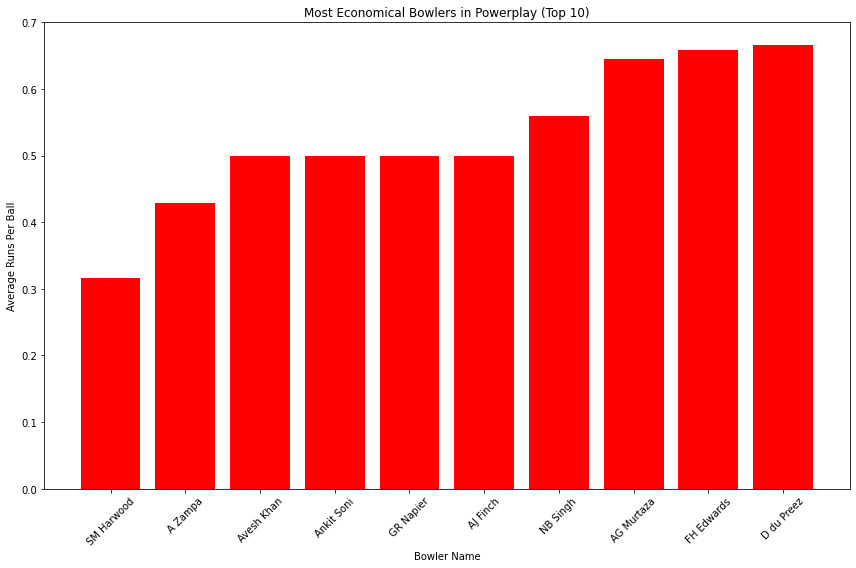

In [0]:
economical_pp_bowlers_pd = powerplay_economy_df.toPandas()

plt.figure(figsize=(12,8))
top_economical_bowlers = economical_pp_bowlers_pd.nsmallest(10, 'avg_runs_per_ball_in_pp')
plt.bar(top_economical_bowlers['player_name'],top_economical_bowlers['avg_runs_per_ball_in_pp'], color = 'red')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs Per Ball')
plt.title('Most Economical Bowlers in Powerplay (Top 10)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

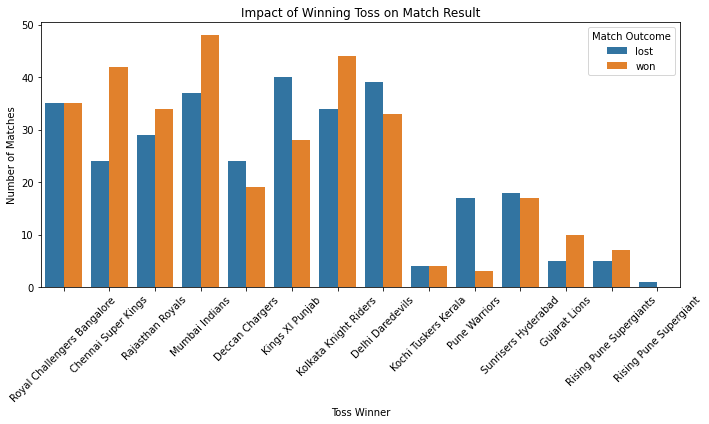

In [0]:
toss_impact_individual_pd = toss_impact_individual_df.toPandas() 

plt.figure(figsize=(10,6))
sns.countplot(x='toss_winner', hue='match_outcome', data = toss_impact_individual_pd)
plt.title('Impact of Winning Toss on Match Result')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [0]:
score_by_venue_df = spark.sql(
    '''
    select 
        venue,
        innings,
        avg(total_runs) as avg_runs_per_innings,
        max(total_runs) as highest_total
    from (
          select 
                b.match_id,
                b.innings_no as innings,
                m.venue_name as venue,
                sum(b.runs_scored) as total_runs
          from ball_by_ball b
          join match m on b.match_id = m.match_id
          group by b.match_id, b.innings_no, m.venue_name
    )a
    where a.innings = 1
    group by a.innings, a.venue 
    order by avg_runs_per_innings desc;
    '''
)
score_by_venue_df.show()

+--------------------+-------+--------------------+-------------+
|               venue|innings|avg_runs_per_innings|highest_total|
+--------------------+-------+--------------------+-------------+
|   Brabourne Stadium|      1|  168.27272727272728|          196|
|Himachal Pradesh ...|      1|  164.88888888888889|          205|
|Saurashtra Cricke...|      1|               164.0|          209|
|    Barabati Stadium|      1|  162.28571428571428|          221|
|Punjab Cricket As...|      1|  161.42857142857142|          184|
|M Chinnaswamy Sta...|      1|  158.93939393939394|          252|
|Maharashtra Crick...|      1|               157.8|          197|
|MA Chidambaram St...|      1|            157.3125|          240|
|Rajiv Gandhi Inte...|      1|              157.25|          201|
|Sardar Patel Stad...|      1|               155.5|          186|
|    Wankhede Stadium|      1|  155.17543859649123|          228|
|Punjab Cricket As...|      1|   154.4857142857143|          234|
|    Feroz

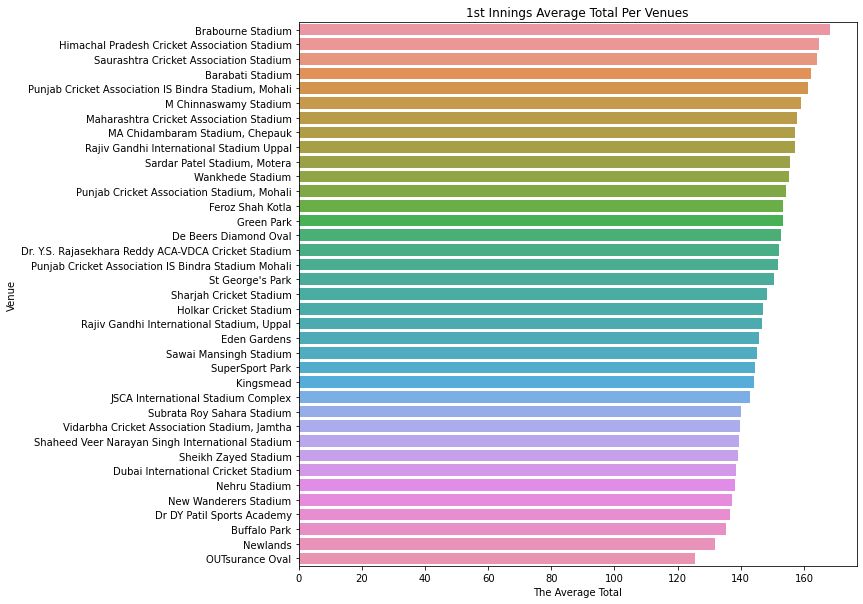

In [0]:
score_by_venue_pd = score_by_venue_df.toPandas() 

plt.figure(figsize=(10,10))
sns.barplot(x='avg_runs_per_innings', y='venue', data = score_by_venue_pd)
plt.title('1st Innings Average Total Per Venues')
plt.xlabel('The Average Total')
plt.ylabel('Venue')
plt.show()

In [0]:
score_by_venue_second_innings_df = spark.sql(
    '''
    select 
        venue,
        innings,
        avg(total_runs) as avg_runs_per_innings,
        max(total_runs) as highest_total
    from (
          select 
                b.match_id,
                b.innings_no as innings,
                m.venue_name as venue,
                sum(b.runs_scored) as total_runs
          from ball_by_ball b
          join match m on b.match_id = m.match_id
          group by b.match_id, b.innings_no, m.venue_name
    )a
    where a.innings = 2
    group by a.innings, a.venue 
    order by avg_runs_per_innings desc;
    '''
)
score_by_venue_second_innings_df.show()

+--------------------+-------+--------------------+-------------+
|               venue|innings|avg_runs_per_innings|highest_total|
+--------------------+-------+--------------------+-------------+
|   Brabourne Stadium|      2|  158.54545454545453|          203|
|Punjab Cricket As...|      2|  157.42857142857142|          171|
|          Green Park|      2|              155.75|          194|
|Saurashtra Cricke...|      2|               154.5|          184|
|    Barabati Stadium|      2|  151.28571428571428|          183|
|Holkar Cricket St...|      2|               150.2|          191|
|Rajiv Gandhi Inte...|      2|             145.125|          169|
|Maharashtra Crick...|      2|  144.73333333333332|          189|
|Punjab Cricket As...|      2|              144.25|          186|
|MA Chidambaram St...|      2|  143.77083333333334|          208|
|Punjab Cricket As...|      2|  143.25714285714287|          196|
|    Wankhede Stadium|      2|               143.0|          215|
|     Supe

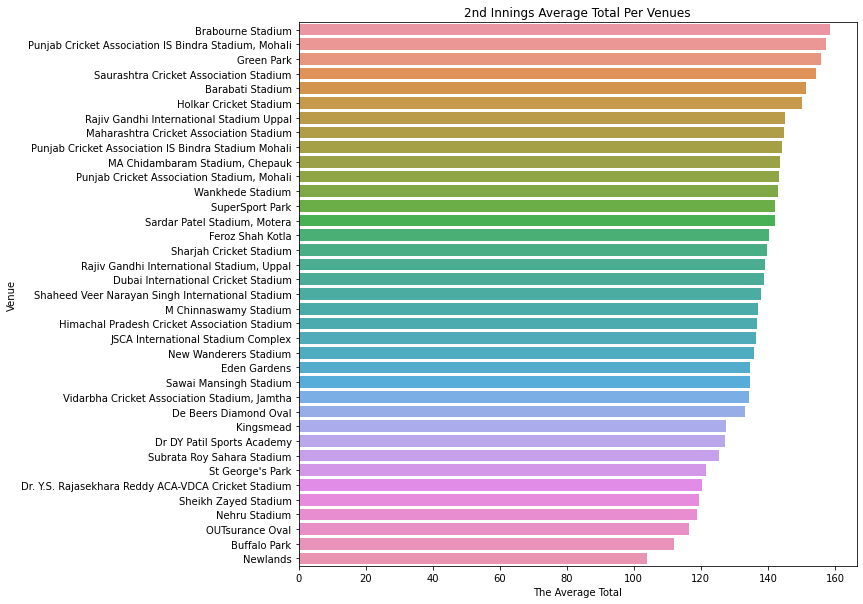

In [0]:
score_by_venue_second_innings_pd = score_by_venue_second_innings_df.toPandas() 

plt.figure(figsize=(10,10))
sns.barplot(x='avg_runs_per_innings', y='venue', data = score_by_venue_second_innings_pd)
plt.title('2nd Innings Average Total Per Venues')
plt.xlabel('The Average Total')
plt.ylabel('Venue')
plt.show()

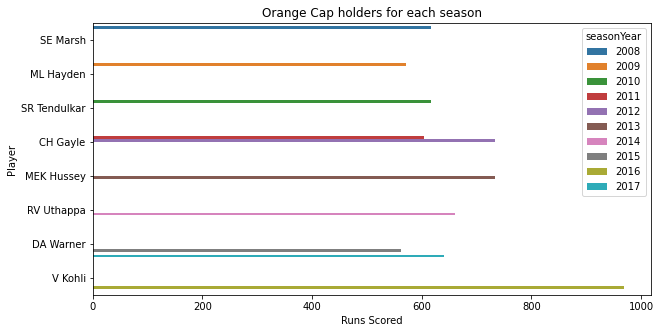

In [0]:
top_scoring_peryear_pd = top_scoring_peryear_df.toPandas() 

plt.figure(figsize=(10,5))
sns.barplot(x='total_runs', y='playerName', hue='seasonYear', data = top_scoring_peryear_pd)
plt.title('Orange Cap holders for each season')
plt.xlabel('Runs Scored')
plt.ylabel('Player')
plt.show()

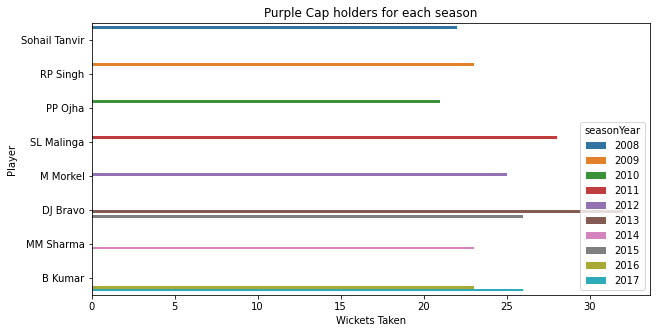

In [0]:
top_wickets_peryear_pd = top_wickets_peryear_df.toPandas() 

plt.figure(figsize=(10,5))
sns.barplot(x='total_wickets', y='playerName', hue='seasonYear', data = top_wickets_peryear_pd)
plt.title('Purple Cap holders for each season')
plt.xlabel('Wickets Taken')
plt.ylabel('Player')
plt.show()